Input Data:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

🔍 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



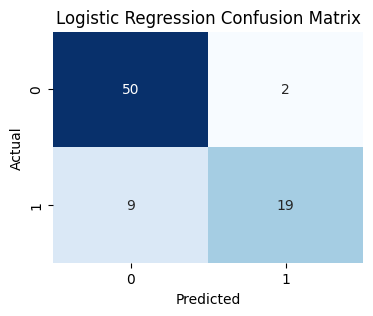


🔍 Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



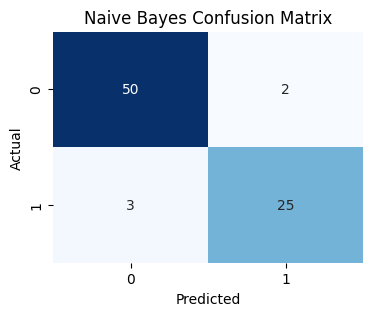


🔍 K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.86      0.89      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.91      0.91        80



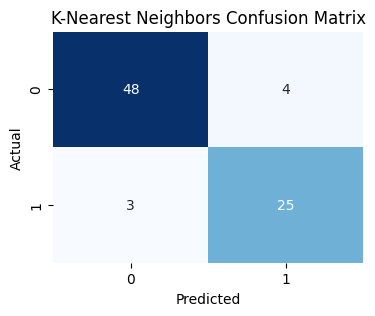

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset from URL
url = "https://clinicaldatascience.io/datasets/Social_Network_Ads.csv"
data = pd.read_csv(url)

# Display first few rows
print("Input Data:")
print(data.head())

# Select features and target
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------ Models ------------------------

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_preds = nb_model.predict(X_test_scaled)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_preds = knn_model.predict(X_test_scaled)

# -------------------- Evaluation ------------------------

def evaluate_model(name, y_true, y_pred):
    print(f"\n🔍 {name} Classification Report:")
    print(classification_report(y_true, y_pred))
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Naive Bayes", y_test, nb_preds)
evaluate_model("K-Nearest Neighbors", y_test, knn_preds)
